## PROBLEM 2

In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [2]:
CarCrash_data=pd.read_csv("Car crash.csv")

# EDA

In [3]:
CarCrash_data.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0,02:13:02
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0,02:17:01
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0,0.138206019
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0,0.138206019
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0,04:58:01


In [4]:
CarCrash_data = CarCrash_data.drop('Unnamed: 0', axis=1)

In [5]:
CarCrash_data.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0,02:13:02
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0,02:17:01
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0,0.138206019
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0,0.138206019
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0,04:58:01


In [6]:
CarCrash_data.tail()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985,unavail,driver,0,0.0,82:107:1
11213,Oct-24,71.228,survived,airbag,belted,1,m,54,2002,2002,nodeploy,driver,0,2.0,82:108:2
11214,Oct-24,10.474,survived,airbag,belted,1,f,27,2002,1990,deploy,driver,1,3.0,82:110:1
11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999,deploy,driver,1,0.0,82:110:2
11216,25-39,10.474,survived,airbag,belted,1,m,17,2002,1999,deploy,pass,1,0.0,82:110:2


In [7]:
CarCrash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  int64  
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+ MB


In [8]:
CarCrash_data.dtypes

dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh          int64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
caseid          object
dtype: object

In [9]:
CarCrash_data.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11140.000000
mean,431.405309,0.644022,37.427654,2001.103236,1994.177944,0.389141,1.825583
std,1406.202941,0.478830,18.192429,1.056805,5.658704,0.487577,1.378535
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [10]:
CarCrash_data.select_dtypes(include='object').head()

,dvcat,Survived,airbag,seatbelt,sex,abcat,occRole,caseid
0,55+,Not_Survived,none,none,m,unavail,driver,02:13:02
1,25-39,Not_Survived,airbag,belted,f,nodeploy,driver,02:17:01
2,55+,Not_Survived,none,belted,m,unavail,driver,0.138206019
3,55+,Not_Survived,none,belted,f,unavail,pass,0.138206019
4,55+,Not_Survived,none,none,m,unavail,driver,04:58:01


In [11]:
CarCrash_data.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [12]:
dups = CarCrash_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(CarCrash_data.shape)

Number of duplicate rows = 0
(11217, 15)


In [13]:
for feature in CarCrash_data.columns: 
    if CarCrash_data[feature].dtype == 'object': 
        print(feature)
        print(CarCrash_data[feature].value_counts())
        print('\n')
        

dvcat
Oct-24     5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: dvcat, dtype: int64


Survived
survived        10037
Not_Survived     1180
Name: Survived, dtype: int64


airbag
airbag    7064
none      4153
Name: airbag, dtype: int64


seatbelt
belted    7849
none      3368
Name: seatbelt, dtype: int64


sex
m    6048
f    5169
Name: sex, dtype: int64


abcat
deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64


occRole
driver    8786
pass      2431
Name: occRole, dtype: int64


caseid
0.439594907    8
0.606956019    8
0.604872685    8
0.623622685    8
0.451412037    7
              ..
74:169:2       1
74:162:1       1
74:160:1       1
75:71:2        1
43:158:2       1
Name: caseid, Length: 6099, dtype: int64




In [14]:
CarCrash_data = CarCrash_data.drop('caseid', axis=1)

In [15]:
CarCrash_data.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0


In [16]:
CarCrash_data['dvcat'].unique()

array(['55+', '25-39', 'Oct-24', '40-54', '1-9km/h'], dtype=object)

In [17]:
CarCrash_data['Survived'].unique()

array(['Not_Survived', 'survived'], dtype=object)

In [18]:
CarCrash_data['airbag'].unique()

array(['none', 'airbag'], dtype=object)

In [19]:
CarCrash_data['seatbelt'].unique()

array(['none', 'belted'], dtype=object)

In [20]:
CarCrash_data['sex'].unique()

array(['m', 'f'], dtype=object)

In [21]:
CarCrash_data['abcat'].unique()

array(['unavail', 'nodeploy', 'deploy'], dtype=object)

In [22]:
CarCrash_data['occRole'].unique()

array(['driver', 'pass'], dtype=object)

In [23]:
CarCrash_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dvcat,11217,5,Oct-24,5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,11217.0,NaN,NaN,NaN,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217,2,survived,10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbag,11217,2,airbag,7064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seatbelt,11217,2,belted,7849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontal,11217.0,NaN,NaN,NaN,0.644022,0.47883,0.0,0.0,1.0,1.0,1.0
sex,11217,2,m,6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ageOFocc,11217.0,NaN,NaN,NaN,37.427654,18.192429,16.0,22.0,33.0,48.0,97.0
yearacc,11217.0,NaN,NaN,NaN,2001.103236,1.056805,1997.0,2001.0,2001.0,2002.0,2002.0
yearVeh,11217.0,NaN,NaN,NaN,1994.177944,5.658704,1953.0,1991.0,1995.0,1999.0,2003.0


In [24]:
CarCrash_data['dvcat'] = CarCrash_data['dvcat'].replace('Oct-24','10-24')

In [25]:
CarCrash_data['dvcat'].unique()

array(['55+', '25-39', '10-24', '40-54', '1-9km/h'], dtype=object)

In [26]:
CarCrash_data["dvcat"]=CarCrash_data["dvcat"].replace('1-9km/h','1-9')

In [27]:
CarCrash_data['dvcat'].unique()

array(['55+', '25-39', '10-24', '40-54', '1-9'], dtype=object)

In [28]:
CarCrash_data["sex"]=CarCrash_data["sex"].replace('f','Female')
CarCrash_data["sex"]=CarCrash_data["sex"].replace('m','Male')

In [29]:
CarCrash_data.select_dtypes(include='object').head()

,dvcat,Survived,airbag,seatbelt,sex,abcat,occRole
0,55+,Not_Survived,none,none,Male,unavail,driver
1,25-39,Not_Survived,airbag,belted,Female,nodeploy,driver
2,55+,Not_Survived,none,belted,Male,unavail,driver
3,55+,Not_Survived,none,belted,Female,unavail,pass
4,55+,Not_Survived,none,none,Male,unavail,driver


## Replacing NULL values in Numerical Columns using Median

In [30]:
median1=CarCrash_data["injSeverity"].median()

CarCrash_data["injSeverity"].replace(np.nan,median1,inplace=True)

In [31]:
CarCrash_data.isnull().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
dtype: int64

In [32]:
cat=[]
num=[]
for i in CarCrash_data.columns:
    if CarCrash_data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['dvcat', 'Survived', 'airbag', 'seatbelt', 'sex', 'abcat', 'occRole']
['weight', 'frontal', 'ageOFocc', 'yearacc', 'yearVeh', 'deploy', 'injSeverity']


<AxesSubplot:>

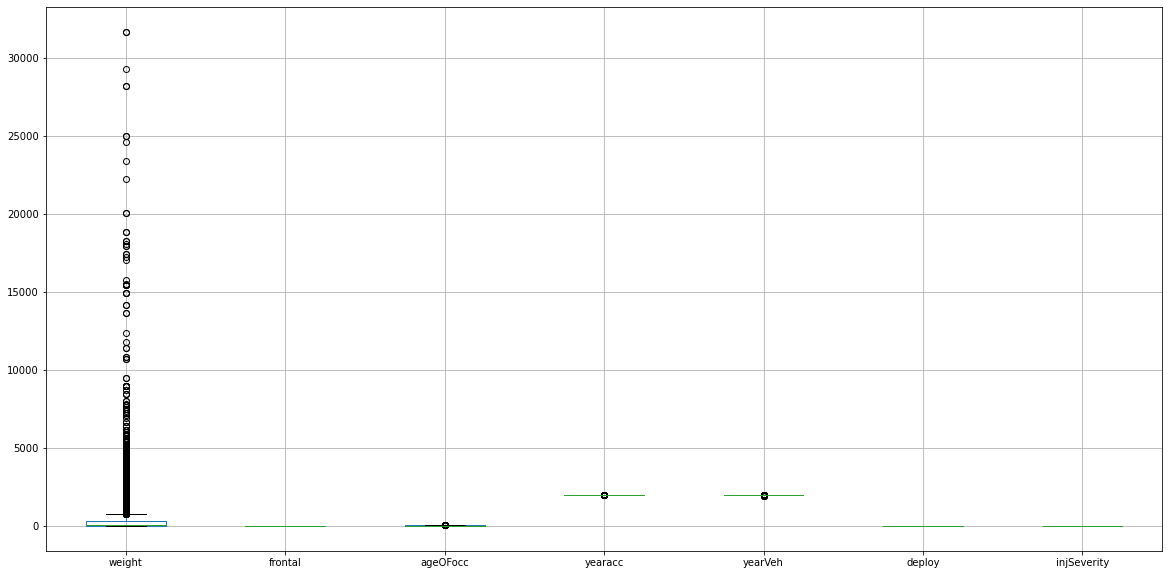

In [33]:
CarCrash_data.boxplot(figsize=(20,10))

# Univariate Analysis

C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarni

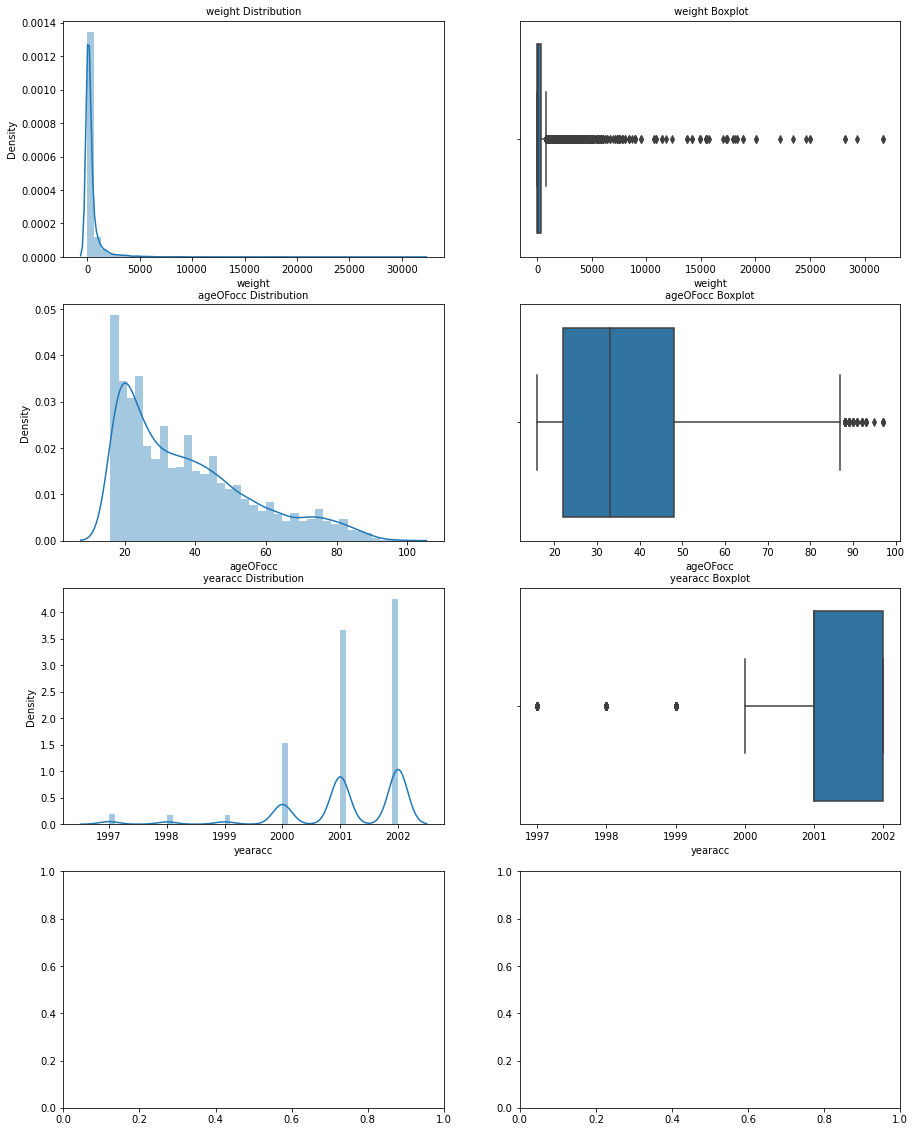

In [34]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(CarCrash_data['weight'] , ax=axes[0][0])
a.set_title("weight Distribution",fontsize=10)

a = sns.boxplot(CarCrash_data['weight'] , orient = "v" , ax=axes[0][1])
a.set_title(" weight Boxplot",fontsize=10)

a = sns.distplot(CarCrash_data['ageOFocc'] , ax=axes[1][0])
a.set_title("ageOFocc Distribution",fontsize=10)

a = sns.boxplot(CarCrash_data['ageOFocc'] , orient = "v" , ax=axes[1][1])
a.set_title("ageOFocc Boxplot",fontsize=10)


a = sns.distplot(CarCrash_data['yearacc'] , ax=axes[2][0])
a.set_title("yearacc Distribution",fontsize=10)

a = sns.boxplot(CarCrash_data['yearacc'] , orient = "v" , ax=axes[2][1])
a.set_title("yearacc Boxplot",fontsize=10)

plt.show()

In [35]:
print(cat) 
print(num)

['dvcat', 'Survived', 'airbag', 'seatbelt', 'sex', 'abcat', 'occRole']
['weight', 'frontal', 'ageOFocc', 'yearacc', 'yearVeh', 'deploy', 'injSeverity']


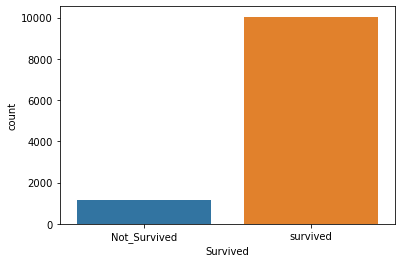

In [36]:
sns.countplot(x='Survived', data=CarCrash_data);

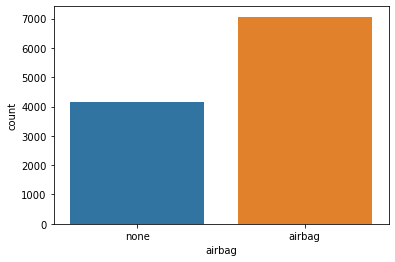

In [37]:
sns.countplot(x='airbag', data=CarCrash_data);

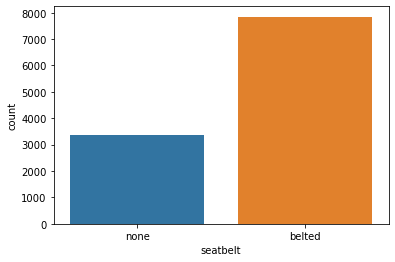

In [38]:
sns.countplot(x='seatbelt', data=CarCrash_data);

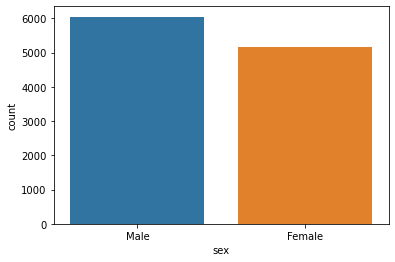

In [39]:
sns.countplot(x='sex', data=CarCrash_data);

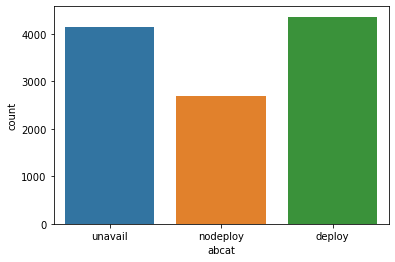

In [40]:
sns.countplot(x='abcat', data=CarCrash_data);

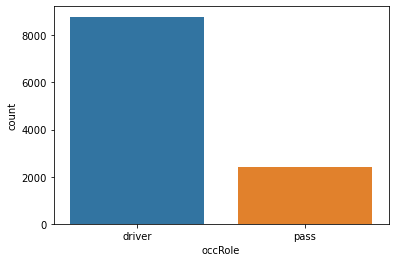

In [41]:
sns.countplot(x='occRole', data=CarCrash_data);

# Bivariate Analysis

In [42]:
print(cat) 
print(num)

['dvcat', 'Survived', 'airbag', 'seatbelt', 'sex', 'abcat', 'occRole']
['weight', 'frontal', 'ageOFocc', 'yearacc', 'yearVeh', 'deploy', 'injSeverity']


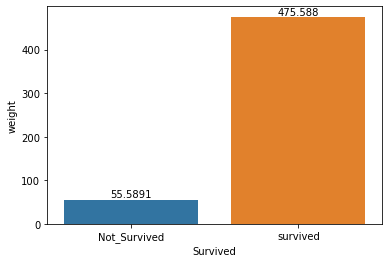

In [43]:
ax=sns.barplot(x="Survived", y="weight", data=CarCrash_data,ci=None)
for i in ax.containers:
    ax.bar_label(i,)

C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


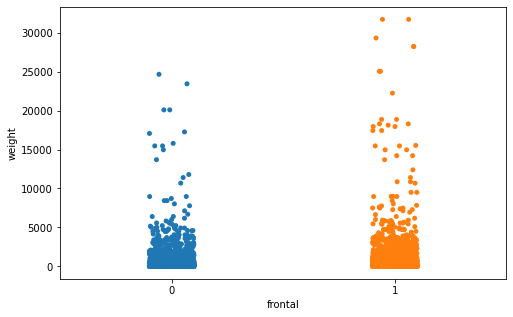

In [44]:
plt.figure(figsize=(8,5))
sns.stripplot(CarCrash_data["frontal"], CarCrash_data['weight'], jitter=True) 
plt.show()

C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


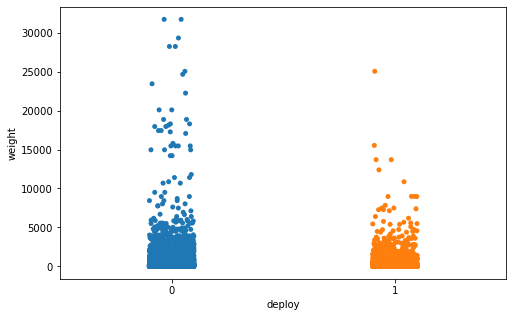

In [45]:
plt.figure(figsize=(8,5))
sns.stripplot(CarCrash_data["deploy"], CarCrash_data['weight'], jitter=True) 
plt.show()

C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


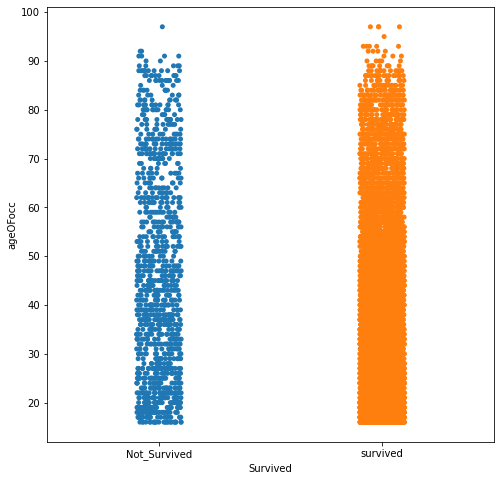

In [46]:
plt.figure(figsize=(8,8))
sns.stripplot(CarCrash_data["Survived"], CarCrash_data['ageOFocc'], jitter=True) 
plt.show()

C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


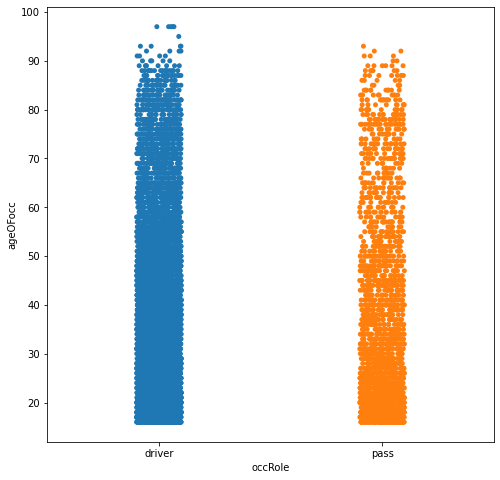

In [47]:
plt.figure(figsize=(8,8))
sns.stripplot(CarCrash_data["occRole"], CarCrash_data['ageOFocc'], jitter=True) 
plt.show()

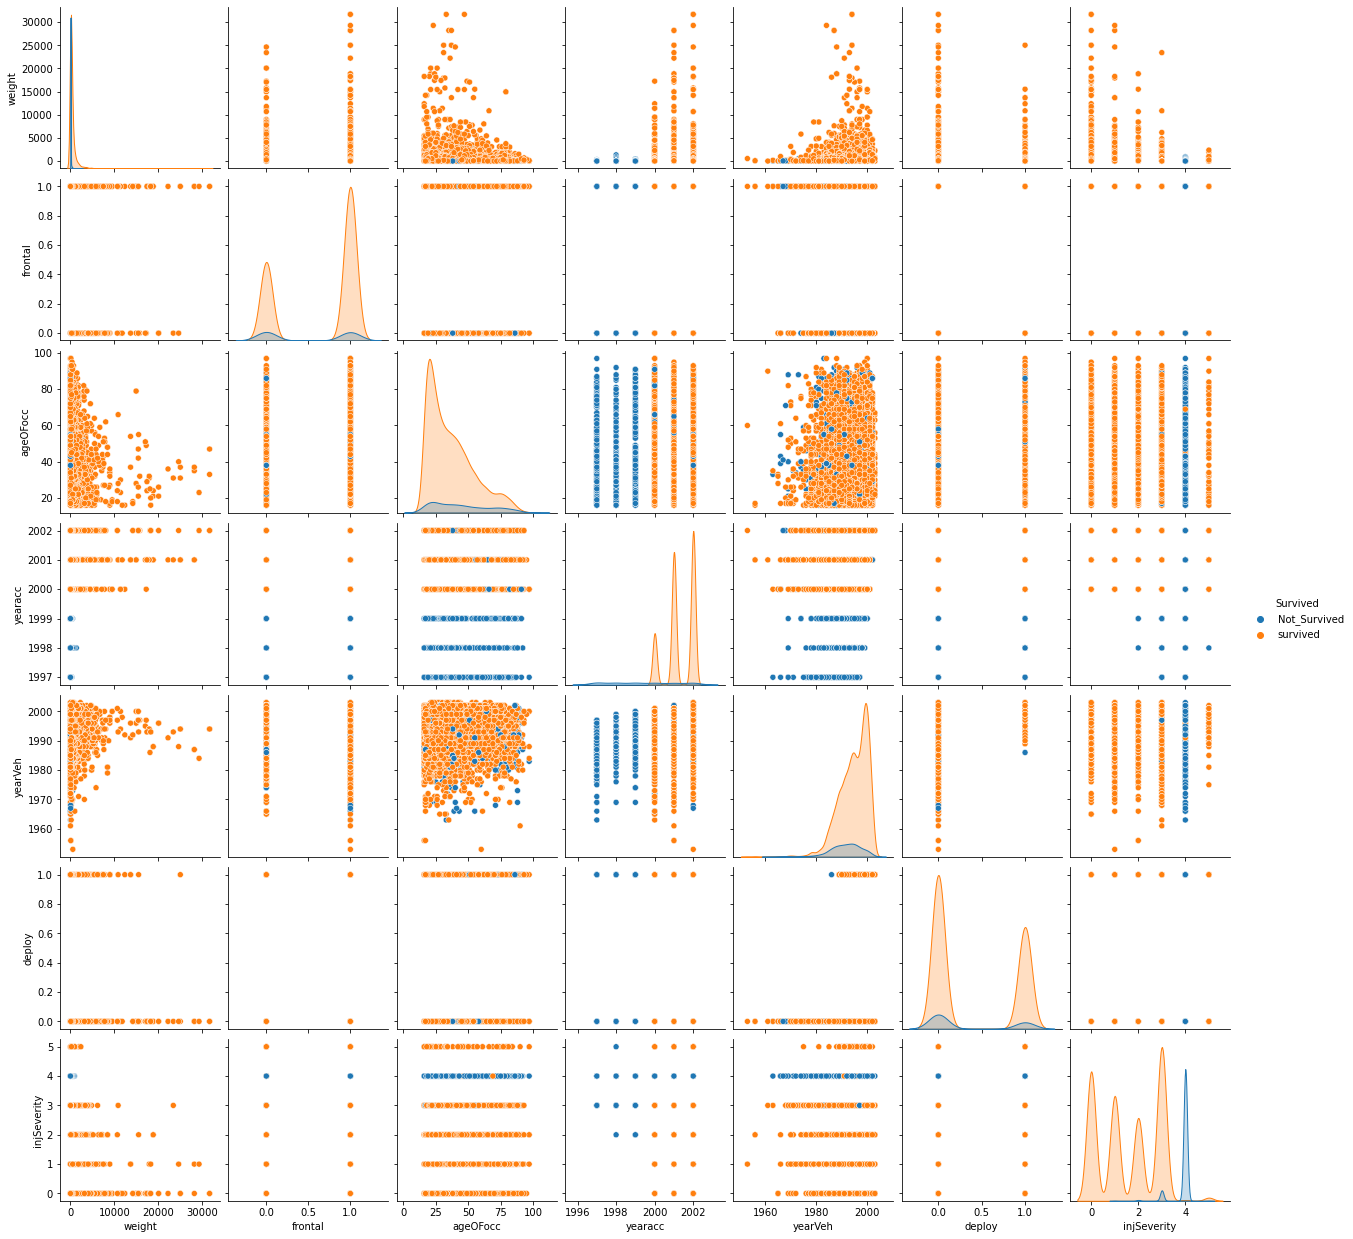

In [48]:
sns.pairplot(CarCrash_data,hue="Survived",diag_kind='kde')

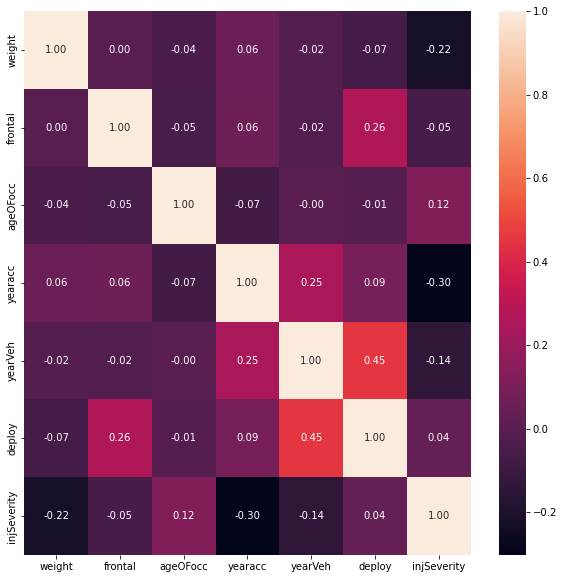

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(CarCrash_data.corr(),annot=True,fmt=".2f");

In [50]:
corr = CarCrash_data.corr()
round(corr,2)

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
weight,1.00,0.00,-0.04,0.06,-0.02,-0.07,-0.22
frontal,0.00,1.00,-0.05,0.06,-0.02,0.26,-0.05
ageOFocc,-0.04,-0.05,1.00,-0.07,-0.00,-0.01,0.12
yearacc,0.06,0.06,-0.07,1.00,0.25,0.09,-0.30
yearVeh,-0.02,-0.02,-0.00,0.25,1.00,0.45,-0.14
deploy,-0.07,0.26,-0.01,0.09,0.45,1.00,0.04
injSeverity,-0.22,-0.05,0.12,-0.30,-0.14,0.04,1.00


In [51]:
CarCrash_data.dtypes

dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh          int64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
dtype: object

In [52]:
for feature in CarCrash_data.columns: # Loop through all columns in the dataframe
    if CarCrash_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        CarCrash_data[feature] = pd.Categorical(CarCrash_data[feature])# Replace strings with an integer
CarCrash_data.head(10)

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.078,Not_Survived,none,none,1,Male,32,1997,1987,unavail,driver,0,4.0
1,25-39,89.627,Not_Survived,airbag,belted,0,Female,54,1997,1994,nodeploy,driver,0,4.0
2,55+,27.078,Not_Survived,none,belted,1,Male,67,1997,1992,unavail,driver,0,4.0
3,55+,27.078,Not_Survived,none,belted,1,Female,64,1997,1992,unavail,pass,0,4.0
4,55+,13.374,Not_Survived,none,none,1,Male,23,1997,1986,unavail,driver,0,4.0
5,25-39,12.383,Not_Survived,none,belted,0,Female,77,1997,1992,unavail,pass,0,4.0
6,55+,13.374,Not_Survived,none,none,0,Male,34,1997,1990,unavail,driver,0,4.0
7,10-24,13.374,Not_Survived,airbag,belted,1,Male,37,1997,1995,deploy,driver,1,4.0
8,40-54,13.374,Not_Survived,none,none,0,Female,33,1997,1987,unavail,driver,0,4.0
9,25-39,15.355,Not_Survived,airbag,none,1,Female,84,1997,1996,deploy,driver,1,4.0


In [53]:
print(CarCrash_data.dvcat.value_counts())
print(CarCrash_data.airbag.value_counts())
print(CarCrash_data.seatbelt.value_counts())
print(CarCrash_data.sex.value_counts())
print(CarCrash_data.abcat.value_counts())
print(CarCrash_data.occRole.value_counts())

10-24    5414
25-39    3368
40-54    1344
55+       809
1-9       282
Name: dvcat, dtype: int64
airbag    7064
none      4153
Name: airbag, dtype: int64
belted    7849
none      3368
Name: seatbelt, dtype: int64
Male      6048
Female    5169
Name: sex, dtype: int64
deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64
driver    8786
pass      2431
Name: occRole, dtype: int64


In [54]:
CarCrash_data['Survived'].value_counts().head(5)

survived        10037
Not_Survived     1180
Name: Survived, dtype: int64

In [55]:
## Converting the 'dvcat' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [56]:
CarCrash_data['dvcat'] = LE.fit_transform(CarCrash_data['dvcat'])
CarCrash_data.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,4,27.078,Not_Survived,none,none,1,Male,32,1997,1987,unavail,driver,0,4.0
1,2,89.627,Not_Survived,airbag,belted,0,Female,54,1997,1994,nodeploy,driver,0,4.0
2,4,27.078,Not_Survived,none,belted,1,Male,67,1997,1992,unavail,driver,0,4.0
3,4,27.078,Not_Survived,none,belted,1,Female,64,1997,1992,unavail,pass,0,4.0
4,4,13.374,Not_Survived,none,none,1,Male,23,1997,1986,unavail,driver,0,4.0


In [57]:
replaceStruct = {
                "Survived": {"Not_Survived": 0, "survived": 1 } 
                   }

In [58]:
CarCrash_data=CarCrash_data.replace(replaceStruct)

In [59]:
cat

['dvcat', 'Survived', 'airbag', 'seatbelt', 'sex', 'abcat', 'occRole']

In [60]:
cat1 = ['airbag', 'seatbelt', 'sex', 'abcat','occRole']

In [61]:
CarCrash_data_dummy =pd.get_dummies(CarCrash_data, columns=cat1,drop_first=True)

In [62]:
CarCrash_data_dummy

,dvcat,weight,Survived,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity,airbag_none,seatbelt_none,sex_Male,abcat_nodeploy,abcat_unavail,occRole_pass
0,4,27.078,0,1,32,1997,1987,0,4.0,1,1,1,0,1,0
1,2,89.627,0,0,54,1997,1994,0,4.0,0,0,0,1,0,0
2,4,27.078,0,1,67,1997,1992,0,4.0,1,0,1,0,1,0
3,4,27.078,0,1,64,1997,1992,0,4.0,1,0,0,0,1,1
4,4,13.374,0,1,23,1997,1986,0,4.0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,2,3179.688,1,1,17,2002,1985,0,0.0,1,0,1,0,1,0
11213,1,71.228,1,1,54,2002,2002,0,2.0,0,0,1,1,0,0
11214,1,10.474,1,1,27,2002,1990,1,3.0,0,0,0,0,0,0
11215,2,10.474,1,1,18,2002,1999,1,0.0,0,0,0,0,0,0


# Train Test Split

In [63]:
# Copy all the predictor variables into X dataframe
X = CarCrash_data_dummy.drop('Survived', axis=1)

# Copy target into the y dataframe. 
y = CarCrash_data_dummy['Survived']

In [64]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=CarCrash_data_dummy['Survived'])

In [65]:
y_train.value_counts()

1    7025
0     826
Name: Survived, dtype: int64

In [66]:
y_test.value_counts()

1    3012
0     354
Name: Survived, dtype: int64

# Logistic Regression Model

In [67]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

## Predicting on Training and Test dataset

In [68]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

## Getting the Predicted Classes and Probs

In [69]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.021293,0.978707
1,0.001950,0.998050
2,0.002723,0.997277
3,0.000035,0.999965
4,0.013185,0.986815


## Model Evaluation

In [70]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.9802572920647051

## AUC and ROC for the training data

AUC: 0.992


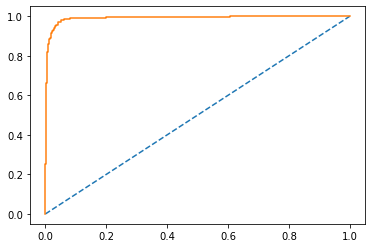

In [71]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [72]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.9824717765894236

## AUC and ROC for the test data

AUC: 0.992


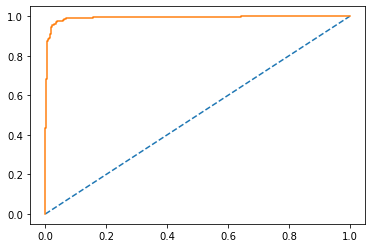

In [73]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Confusion Matrix for the training data

In [74]:
confusion_matrix(y_train, ytrain_predict)

array([[ 728,   98],
       [  57, 6968]], dtype=int64)

C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


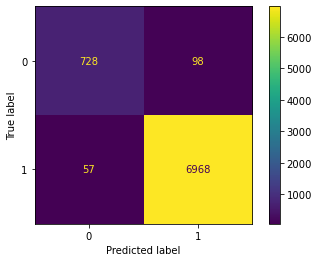

In [75]:
plot_confusion_matrix(model,X_train,y_train);

In [76]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       826
           1       0.99      0.99      0.99      7025

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



## Confusion Matrix for test data

In [77]:
confusion_matrix(y_test, ytest_predict)

array([[ 316,   38],
       [  21, 2991]], dtype=int64)

C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


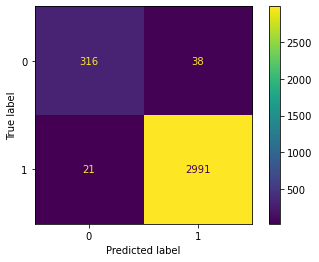

In [78]:
plot_confusion_matrix(model,X_test,y_test);

In [79]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       354
           1       0.99      0.99      0.99      3012

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



## Applying GridSearchCV for Logistic Regression

In [80]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [81]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [82]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [83]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [84]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [85]:
best_model = grid_search.best_estimator_

In [86]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [87]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.046212,0.953788
1,0.001691,0.998309
2,0.018339,0.981661
3,0.000122,0.999878
4,0.013141,0.986859


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       826
           1       0.99      0.99      0.99      7025

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851
 



C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


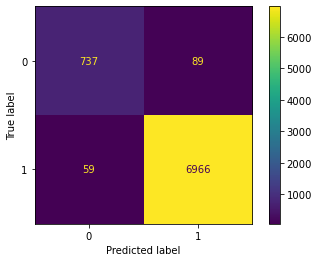

In [88]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       354
           1       0.99      0.99      0.99      3012

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366
 



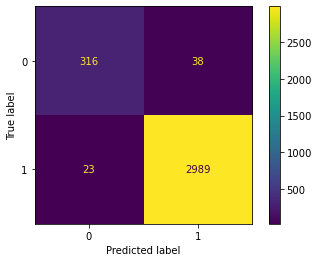

In [89]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

# LDA Model

In [90]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

## Prediction

In [91]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

## Training Data and Test Data Confusion Matrix Comparison

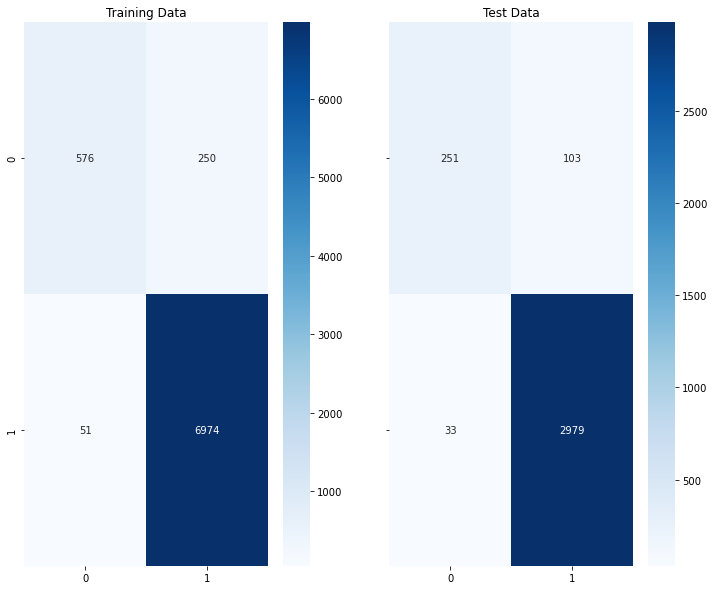

In [92]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(12,10))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_class_train)),annot=True,fmt='.5g',cmap = 'Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap = 'Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

## Training Data and Test Data Classification Report Comparison

In [93]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.92      0.70      0.79       826
           1       0.97      0.99      0.98      7025

    accuracy                           0.96      7851
   macro avg       0.94      0.85      0.89      7851
weighted avg       0.96      0.96      0.96      7851
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      0.71      0.79       354
           1       0.97      0.99      0.98      3012

    accuracy                           0.96      3366
   macro avg       0.93      0.85      0.88      3366
weighted avg       0.96      0.96      0.96      3366
 



## Probability prediction for the training and test data

In [94]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [95]:
pred_prob_train[:,1]

array([0.99997672, 0.99994677, 0.81597119, ..., 0.99663948, 0.99874817,
       0.99998964])

AUC for the Training Data: 0.968


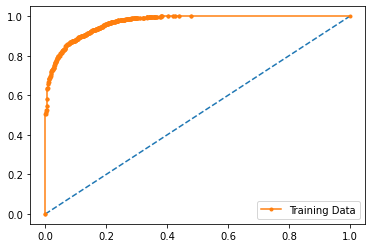

In [96]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()



AUC for the Test Data: 0.967


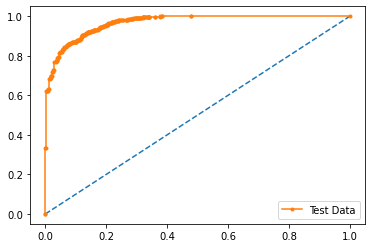

In [97]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()